In [61]:
#importing libraries
import pandas as pd#for data handling
import numpy as np#for data handling
#scikit-learn for model training and preprocessing. 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#imblearn for handling imbalanced data using SMOTE.
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
#xgboost and catboost for advanced machine learning models.
import xgboost as xgb
import catboost as cb

In [62]:
# Loading the dataset
df = pd.read_csv('/home/rgukt/Desktop/MINI_PROJECT/data_without_infertility_final.csv')


In [63]:
print(df)

     Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1             10001           0          28         44.6   
1         2             10002           0          36         65.0   
2         3             10003           1          33         68.8   
3         4             10004           0          37         65.0   
4         5             10005           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537             10537           0          35         50.0   
537     538             10538           0          30         63.2   
538     539             10539           0          36         54.0   
539     540             10540           0          27         50.0   
540     541             10541           1          23         82.0   

     Height(Cm)         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
0        152.000  19.300000           15                78                22   

In [64]:
# Droping unnecessary columns
df.drop(columns=['Sl. No', 'Patient File No.', 'Unnamed_42'], errors='ignore',inplace=True)

In [65]:
print(df)

     PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
0             0          28         44.6      152.000  19.300000           15   
1             0          36         65.0      161.500  24.921163           15   
2             1          33         68.8      165.000  25.270891           11   
3             0          37         65.0      148.000  29.674945           13   
4             0          25         52.0      161.000  20.060954           11   
..          ...         ...          ...          ...        ...          ...   
536           0          35         50.0      164.592  18.500000           17   
537           0          30         63.2      158.000  25.300000           15   
538           0          36         54.0      152.000  23.400000           13   
539           0          27         50.0      150.000  22.200000           15   
540           1          23         82.0      165.000  30.100000           13   

     Pulse rate(bpm)   RR (

In [66]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'FSH(mIU/mL)', 'LH(mIU/mL)',
       'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 42'],
      dtype='object')

In [67]:
df.drop('Unnamed: 42', axis=1, inplace=True)


In [68]:
df.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'FSH(mIU/mL)', 'LH(mIU/mL)',
       'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [69]:
# Clean column names to remove special characters
df.columns = df.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

In [70]:
print(df.columns)

Index(['PCOSYN', 'Ageyrs', 'WeightKg', 'HeightCm', 'BMI', 'BloodGroup',
       'Pulseratebpm', 'RRbreathsmin', 'Hbgdl', 'CycleRI', 'Cyclelengthdays',
       'MarraigeStatusYrs', 'PregnantYN', 'Noofaborptions', 'FSHmIUmL',
       'LHmIUmL', 'FSHLH', 'Hipinch', 'Waistinch', 'WaistHipRatio', 'TSHmIUL',
       'AMHngmL', 'PRLngmL', 'VitD3ngmL', 'PRGngmL', 'RBSmgdl', 'WeightgainYN',
       'hairgrowthYN', 'SkindarkeningYN', 'HairlossYN', 'PimplesYN',
       'FastfoodYN', 'RegExerciseYN', 'BP_SystolicmmHg', 'BP_DiastolicmmHg',
       'FollicleNoL', 'FollicleNoR', 'AvgFsizeLmm', 'AvgFsizeRmm',
       'Endometriummm'],
      dtype='object')


In [71]:
# Convert numeric columns to proper numeric types and handle errors
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [72]:
print(df[col])

0       2.07
1       1.53
2       6.63
3       1.22
4       2.26
       ...  
536     1.70
537     5.60
538     3.70
539     5.20
540    20.00
Name: AMHngmL, Length: 541, dtype: float64


In [73]:
# Handle missing values only for numeric columns to avoid issues during model training due to missing data.
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).fillna(df.median())

In [74]:
# Encode categorical values (Yes/No -> 1/0)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [75]:
print(df['PCOSYN'])

0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: PCOSYN, Length: 541, dtype: int64


In [76]:
# Define target and features
target_col = 'PCOSYN'
X = df.drop(columns=[target_col])
y = df[target_col]

In [77]:
print(X)
print(y)

     Ageyrs  WeightKg  HeightCm        BMI  BloodGroup  Pulseratebpm  \
0        28      44.6   152.000  19.300000          15            78   
1        36      65.0   161.500  24.921163          15            74   
2        33      68.8   165.000  25.270891          11            72   
3        37      65.0   148.000  29.674945          13            72   
4        25      52.0   161.000  20.060954          11            72   
..      ...       ...       ...        ...         ...           ...   
536      35      50.0   164.592  18.500000          17            72   
537      30      63.2   158.000  25.300000          15            72   
538      36      54.0   152.000  23.400000          13            74   
539      27      50.0   150.000  22.200000          15            74   
540      23      82.0   165.000  30.100000          13            80   

     RRbreathsmin  Hbgdl  CycleRI  Cyclelengthdays  ...  PimplesYN  \
0              22  10.48        2                5  ...          

In [78]:
# Feature Scaling
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [79]:
print(X)

[[-0.63460643 -1.36476953 -0.74400482 ...  0.83677604  0.76853707
   0.01113306]
 [ 0.84523012  0.48673106  0.83198292 ... -0.00508332 -0.43781578
  -2.20761818]
 [ 0.29029141  0.83161842  1.41260999 ...  0.83677604  1.3717135
   0.70449282]
 ...
 [ 0.84523012 -0.5116271  -0.74400482 ...  0.83677604 -1.94575684
  -0.54355475]
 [-0.819586   -0.87466643 -1.07579171 ...  0.83677604  0.16536065
   1.39785259]
 [-1.55950427  2.02964822  1.41260999 ...  1.11739583  0.76853707
  -0.72845069]]


In [80]:
# Handle Class Imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [81]:
print(X,y)

[[-0.63460643 -1.36476953 -0.74400482 ...  0.83677604  0.76853707
   0.01113306]
 [ 0.84523012  0.48673106  0.83198292 ... -0.00508332 -0.43781578
  -2.20761818]
 [ 0.29029141  0.83161842  1.41260999 ...  0.83677604  1.3717135
   0.70449282]
 ...
 [ 0.76776324  0.51605488 -0.72463459 ...  0.87594927  0.20746097
   0.11108908]
 [ 1.30721407 -1.53242428 -0.20480942 ... -0.70620956 -0.77668557
  -1.20207224]
 [-0.10840225 -0.82532156  0.34332842 ...  0.56705405  0.79196127
  -0.23793782]] 0      0
1      0
2      1
3      0
4      0
      ..
723    1
724    1
725    1
726    1
727    1
Name: PCOSYN, Length: 728, dtype: int64


In [82]:
# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42), n_features_to_select=15)
print(selector)
X = selector.fit_transform(X, y)

RFE(estimator=GradientBoostingClassifier(random_state=42),
    n_features_to_select=15)


In [83]:
print(X)

[[-1.36476953 -0.78516881 -0.62153356 ... -0.74061675 -0.82147079
   0.83677604]
 [ 0.48673106  0.62343983 -0.62153356 ... -0.74061675 -0.37028734
  -0.00508332]
 [ 0.83161842  0.73889956 -0.62153356 ...  1.62603217  1.88562991
   0.83677604]
 ...
 [ 0.51605488 -0.32983704  1.59793611 ... -0.03062207 -0.27581265
   0.87594927]
 [-1.53242428 -0.15588429 -0.62153356 ...  0.79806198  1.09594546
  -0.70620956]
 [-0.82532156  1.47089222 -0.62153356 ...  0.86089258  1.85058673
   0.56705405]]


In [84]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
print(X_train, X_test, y_train, y_test)

[[-0.2393476   0.39252038 -0.62153356 ... -0.26728697  0.08089611
  -0.56632289]
 [ 0.0329319   0.39252038 -0.62153356 ... -0.50395186 -0.59587907
  -0.2857031 ]
 [-0.33010744 -0.41569769 -0.62153356 ...  0.91603749 -0.14469562
  -0.00508332]
 ...
 [-0.41179129  0.96981901 -0.62153356 ...  0.20604282 -0.14469562
   1.11739583]
 [ 0.39597123 -0.06931852 -0.62153356 ... -0.50395186 -0.82147079
  -1.12756246]
 [ 0.42319918  2.00895653  1.59793611 ...  1.38936728  1.20885473
   0.55615626]] [[ 1.30356956 -0.06931852  1.59793611 ... -0.03062207  1.20885473
  -0.56632289]
 [-1.23770577 -0.41569769 -0.62153356 ... -0.97728164 -1.04706252
  -0.2857031 ]
 [-0.5116271  -0.64661714 -0.62153356 ... -0.97728164 -0.59587907
  -1.40818225]
 ...
 [-1.0969641  -0.50996269 -0.62153356 ...  1.25903489  2.05127571
   0.43007502]
 [-0.05782794 -0.53115742  1.59793611 ... -0.74061675 -0.82147079
  -0.56632289]
 [-0.87466643 -1.33937549  1.59793611 ... -1.21394654 -1.27265424
  -0.2857031 ]] 433    0
136    

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%')
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 88.36%
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        71
           1       0.90      0.87      0.88        75

    accuracy                           0.88       146
   macro avg       0.88      0.88      0.88       146
weighted avg       0.88      0.88      0.88       146



In [87]:
from sklearn.svm import SVC

# Train Support Vector Machine
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%')
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 91.78%
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        71
           1       0.91      0.93      0.92        75

    accuracy                           0.92       146
   macro avg       0.92      0.92      0.92       146
weighted avg       0.92      0.92      0.92       146



In [88]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb) * 100:.2f}%')
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 90.41%
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        71
           1       0.88      0.95      0.91        75

    accuracy                           0.90       146
   macro avg       0.91      0.90      0.90       146
weighted avg       0.91      0.90      0.90       146



In [89]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr) * 100:.2f}%')
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 89.04%
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        71
           1       0.88      0.91      0.89        75

    accuracy                           0.89       146
   macro avg       0.89      0.89      0.89       146
weighted avg       0.89      0.89      0.89       146



In [90]:
# Training Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model_v2 = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)
rf_model_v2.fit(X_train, y_train)

# Predict
y_pred_rf_v2 = rf_model_v2.predict(X_test)

# Evaluate
print(f'Random Forest (V2) Accuracy: {accuracy_score(y_test, y_pred_rf_v2) * 100:.2f}%')
print("Classification Report for Random Forest (V2):")
print(classification_report(y_test, y_pred_rf_v2))


Random Forest (V2) Accuracy: 93.84%
Classification Report for Random Forest (V2):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.96      0.92      0.94        75

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146



In [91]:
# Train Gradient Boosting Classifier with tuned hyperparameters
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f'Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb) * 100:.2f}%')
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 91.10%
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        71
           1       0.90      0.93      0.92        75

    accuracy                           0.91       146
   macro avg       0.91      0.91      0.91       146
weighted avg       0.91      0.91      0.91       146



In [92]:
# Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%')
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 92.47%
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.92      0.93      0.93        75

    accuracy                           0.92       146
   macro avg       0.92      0.92      0.92       146
weighted avg       0.92      0.92      0.92       146



In [93]:
# Train CatBoost Classifier
cat_model = cb.CatBoostClassifier(n_estimators=300, learning_rate=0.05, depth=5, verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
print(f'CatBoost Accuracy: {accuracy_score(y_test, y_pred_cat) * 100:.2f}%')
print(classification_report(y_test, y_pred_cat))

CatBoost Accuracy: 94.52%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.95      0.95      0.95        75

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146



In [94]:
import joblib
import pickle as pkl

In [95]:
cat_model = cb.CatBoostClassifier(n_estimators=300, learning_rate=0.05, depth=5, verbose=0)
cat_model.fit(X_train, y_train)

In [96]:
# Save the trained model, scaler, and selector
joblib.dump(cat_model, 'pcos_model.pkl')
joblib.dump(scaler, 'pcos_scaler.pkl')
joblib.dump(selector, 'pcos_selector.pkl')


['pcos_selector.pkl']

In [97]:
# Function to take user inputs and predict
'''def predict_pcos():
    # Load the saved model, scaler, and selector
    model = joblib.load('catboost_pcos_model.pkl')
    scaler = joblib.load('scaler.pkl')
    selector = joblib.load('selector.pkl')

    print("Please enter the following details:")

    # Example features (replace with actual features from your dataset)
    features = {}
    for col in df.columns:
        if col != target_col:
            if df[col].dtype == 'object':
                features[col] = int(input(f"{col} (1 for Yes, 0 for No): "))
            else:
                features[col] = float(input(f"{col}: "))

    # Convert inputs into a DataFrame
    input_data = pd.DataFrame([features])

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Apply feature selection
    input_data_selected = selector.transform(input_data_scaled)

    # Make a prediction
    prediction = model.predict(input_data_selected)
    print(prediction)
    # Output the result
    if prediction[0] == 1:
        print("Prediction: The patient has PCOS.")
    else:
        print("Prediction: The patient does not have PCOS.")

# Test the function
predict_pcos()'''

'def predict_pcos():\n    # Load the saved model, scaler, and selector\n    model = joblib.load(\'catboost_pcos_model.pkl\')\n    scaler = joblib.load(\'scaler.pkl\')\n    selector = joblib.load(\'selector.pkl\')\n\n    print("Please enter the following details:")\n\n    # Example features (replace with actual features from your dataset)\n    features = {}\n    for col in df.columns:\n        if col != target_col:\n            if df[col].dtype == \'object\':\n                features[col] = int(input(f"{col} (1 for Yes, 0 for No): "))\n            else:\n                features[col] = float(input(f"{col}: "))\n\n    # Convert inputs into a DataFrame\n    input_data = pd.DataFrame([features])\n\n    # Scale the input data\n    input_data_scaled = scaler.transform(input_data)\n\n    # Apply feature selection\n    input_data_selected = selector.transform(input_data_scaled)\n\n    # Make a prediction\n    prediction = model.predict(input_data_selected)\n    print(prediction)\n    # Output

In [98]:
'''import pickle
from sklearn.ensemble import RandomForestClassifier

# Ensure model is trained
model = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)
model.fit(X_train, y_train)  # Make sure X_train and y_train are defined

# Save the trained model
model_filename = "/home/rgukt/Desktop/MINI_PROJECT/model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as model.pkl!")'''


'import pickle\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Ensure model is trained\nmodel = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)\nmodel.fit(X_train, y_train)  # Make sure X_train and y_train are defined\n\n# Save the trained model\nmodel_filename = "/home/rgukt/Desktop/MINI_PROJECT/model.pkl"\nwith open(model_filename, \'wb\') as file:\n    pickle.dump(model, file)\n\nprint("Model saved successfully as model.pkl!")'

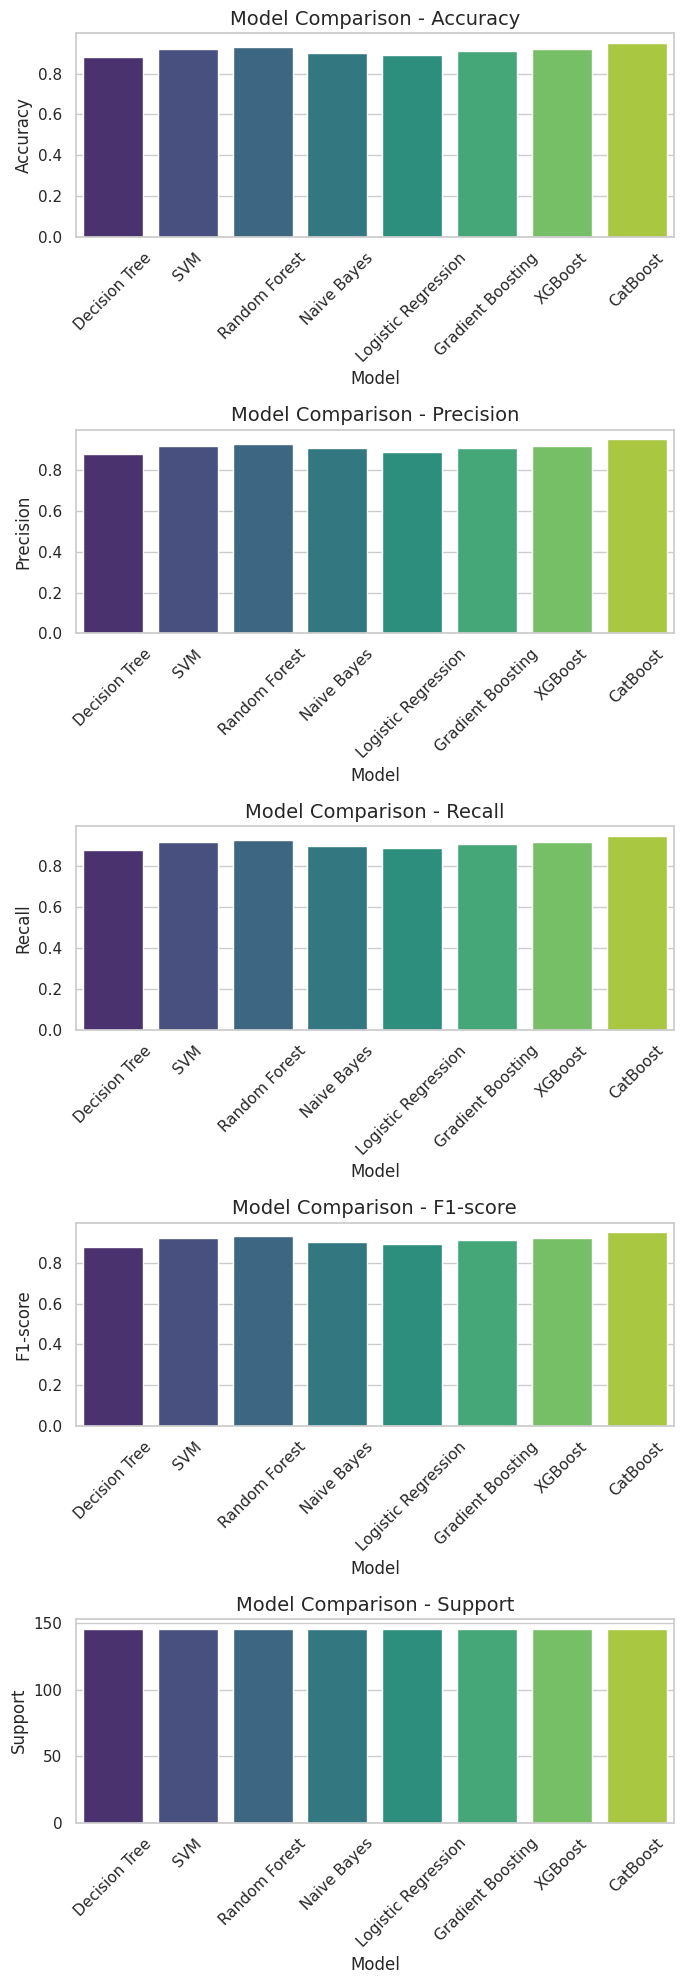

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Replace these values with your actual results from classification_report and accuracy_score
model_metrics = {
    'Decision Tree': {
        'accuracy': 0.88,
        'precision': 0.88,
        'recall': 0.88,
        'f1-score': 0.88,
        'support': 146
    },
    'SVM': {
        'accuracy': 0.92,
        'precision': 0.92,
        'recall': 0.92,
        'f1-score': 0.92,
        'support': 146
    },
    'Random Forest': {
        'accuracy': 0.93,
        'precision': 0.93,
        'recall': 0.93,
        'f1-score': 0.93,
        'support': 146
    },
    'Naive Bayes': {
        'accuracy': 0.90,
        'precision': 0.91,
        'recall': 0.90,
        'f1-score': 0.90,
        'support': 146
    },
    'Logistic Regression': {
        'accuracy': 0.89,
        'precision': 0.89,
        'recall': 0.89,
        'f1-score': 0.89,
        'support': 146
    },
    'Gradient Boosting':{
        'accuracy': 0.91,
        'precision': 0.91,
        'recall': 0.91,
        'f1-score': 0.91,
        'support': 146
    },
    'XGBoost': {
        'accuracy': 0.92,
        'precision': 0.92,
        'recall': 0.92,
        'f1-score': 0.92,
        'support': 146
    },
    'CatBoost': {
        'accuracy': 0.95,
        'precision': 0.95,
        'recall': 0.95,
        'f1-score': 0.95,
        'support': 146
    }
}

# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics).T
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={"index": "Model"}, inplace=True)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(7, 20))

metrics = ['accuracy', 'precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics, 1):
    plt.subplot(5, 1, i)
    sns.barplot(data=metrics_df, x="Model", y=metric, hue="Model", palette='viridis', legend=False)
    plt.title(f'Model Comparison - {metric.capitalize()}', fontsize=14)
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
